In [2]:
!pip install scikit-learn==0.24.2
!pip install category_encoders

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.DataFrame({
    'City' : ['Seoul','Seoul','Seoul','Busan','Busan','Busan','Incheon','Incheon','Seoul','Busan','Incheon'], #범주형
    'Room' : [3,4,3,2,3,3,3,3,3,3,2], #범주형
    'Price' : [55000,61000,44000,35000,53000,45000,32000,51000,50000,40000,30000]
})

In [5]:
df

,City,Room,Price
0,Seoul,3,55000
1,Seoul,4,61000
2,Seoul,3,44000
3,Busan,2,35000
4,Busan,3,53000
5,Busan,3,45000
6,Incheon,3,32000
7,Incheon,3,51000
8,Seoul,3,50000
9,Busan,3,40000


In [7]:
df['City'].value_counts(normalize=True)

Seoul      0.363636
Busan      0.363636
Incheon    0.272727
Name: City, dtype: float64

<AxesSubplot:xlabel='City', ylabel='count'>

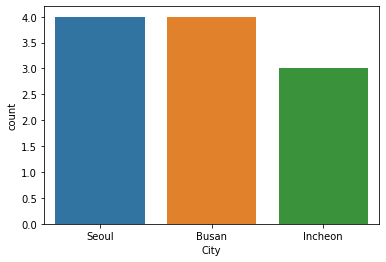

In [8]:
sns.countplot(x=df['City'])

In [9]:
df['Price'].mean()

45090.90909090909

In [10]:
df.groupby('City')['Price'].mean()

City
Busan      43250.000000
Incheon    37666.666667
Seoul      52500.000000
Name: Price, dtype: float64

In [11]:
df.groupby('City')['Price'].agg(['min','max','mean','median'])

,min,max,mean,median
City,,,,
Busan,35000,53000,43250.000000,42500.0
Incheon,30000,51000,37666.666667,32000.0
Seoul,44000,61000,52500.000000,52500.0


In [13]:
df_oh = pd.get_dummies(df, prefix=['City'])
df_oh

,Room,Price,City_Busan,City_Incheon,City_Seoul
0,3,55000,0,0,1
1,4,61000,0,0,1
2,3,44000,0,0,1
3,2,35000,1,0,0
4,3,53000,1,0,0
5,3,45000,1,0,0
6,3,32000,0,1,0
7,3,51000,0,1,0
8,3,50000,0,0,1
9,3,40000,1,0,0


In [15]:
df_dum = pd.get_dummies(df, prefix=['City'], drop_first=True)
df_dum

,Room,Price,City_Incheon,City_Seoul
0,3,55000,0,1
1,4,61000,0,1
2,3,44000,0,1
3,2,35000,0,0
4,3,53000,0,0
5,3,45000,0,0
6,3,32000,1,0
7,3,51000,1,0
8,3,50000,0,1
9,3,40000,0,0


In [16]:
from sklearn.linear_model import LinearRegression

model_oh = LinearRegression()

In [17]:
model_oh.fit(df_oh[['City_Seoul','City_Busan','City_Incheon']],df_oh['Price'])

LinearRegression()

In [18]:
print('coefficients:',model_oh.coef_)
print('intercept:',model_oh.intercept_)

coefficients: [ 8027.77777778 -1222.22222222 -6805.55555556]
intercept: 44472.22222222222


In [19]:
model_dum = LinearRegression()
model_dum.fit(df_oh[['City_Seoul','City_Incheon']], df_oh['Price'])
print('coefficients:',model_dum.coef_)
print('intercept:',model_dum.intercept_)

coefficients: [ 9250.         -5583.33333333]
intercept: 43250.0


In [20]:
import plotly.express as px
px.scatter(
    df_oh,
    x='City_Busan',
    y='Price',
    trendline='ols'
)

c:\Users\jsm88\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.

c:\Users\jsm88\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning:

pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



In [31]:
features = ['City','Room']
target = 'Price'

X_train = df[features][:8]
y_train = df[target][:8]
X_test = df[features][8:]
y_test = df[target][8:]

In [24]:
!pip install category_encoders

In [32]:
from category_encoders import OneHotEncoder

encoder = OneHotEncoder(use_cat_names=True)
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [33]:
X_train.head()

,City_Seoul,City_Busan,City_Incheon,Room
0,1,0,0,3
1,1,0,0,4
2,1,0,0,3
3,0,1,0,2
4,0,1,0,3


In [34]:
X_test

,City_Seoul,City_Busan,City_Incheon,Room
8,1,0,0,3
9,0,1,0,3
10,0,0,1,2


In [35]:
df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/kc_house_data/kc_house_data.csv')

In [36]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [39]:
df['date']

0        20141013T000000
1        20141209T000000
2        20150225T000000
3        20141209T000000
4        20150218T000000
              ...       
21608    20140521T000000
21609    20150223T000000
21610    20140623T000000
21611    20150116T000000
21612    20141015T000000
Name: date, Length: 21613, dtype: object

In [40]:
df['date'] = pd.to_datetime(df['date'])

In [41]:
df['date'].sort_values()

16768   2014-05-02
9596    2014-05-02
9587    2014-05-02
20602   2014-05-02
11577   2014-05-02
           ...    
7898    2015-05-14
928     2015-05-14
5637    2015-05-15
13053   2015-05-24
16594   2015-05-27
Name: date, Length: 21613, dtype: datetime64[ns]

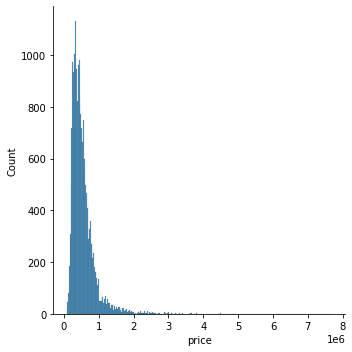

In [42]:
sns.displot(df['price'])

In [43]:
df = df[(df['price'] >= np.percentile(df['price'],5)) &
        (df['price'] <= np.percentile(df['price'],95))]

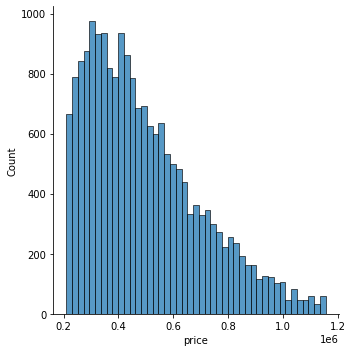

In [44]:
sns.displot(df['price'])

In [48]:
cutOff = pd.to_datetime('2015-03-01')
train = df[df['date'] < cutOff]
test = df[df['date'] >= cutOff]
cutOff

Timestamp('2015-03-01 00:00:00')

In [49]:
train.shape, test.shape

((15208, 21), (4303, 21))

In [50]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [52]:
def engineer_features(X):
    X = X.copy()
    X['bathrooms'] = X['bathrooms'].round(0).astype(int)
    X['rooms'] = X['bedrooms'] + X['bathrooms']
    X = X.drop(['id','date','waterfront'], axis=1)
    return X

train = engineer_features(train)
test = engineer_features(test)

In [53]:
train.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,rooms
0,221900.0,3,1,1180,5650,1.0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,4
1,538000.0,3,2,2570,7242,2.0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,5
3,604000.0,4,3,1960,5000,1.0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,7
4,510000.0,3,2,1680,8080,1.0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,5
6,257500.0,3,2,1715,6819,2.0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819,5


In [54]:
from math import factorial
n = len(train.columns)

def n_choose_k(n,k):
    return factorial(n) / (factorial(k)*factorial(n-k))

combinations = sum(n_choose_k(n,k) for k in range(1,n+1))
combinations

524287.0

In [55]:
train.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,rooms
0,221900.0,3,1,1180,5650,1.0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,4
1,538000.0,3,2,2570,7242,2.0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,5
3,604000.0,4,3,1960,5000,1.0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,7
4,510000.0,3,2,1680,8080,1.0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,5
6,257500.0,3,2,1715,6819,2.0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819,5


In [57]:
target = 'price'

X_train = train.drop(columns=target)
y_train = train[target]
X_test = test.drop(columns=target)
y_test = test[target]

In [58]:
from sklearn.feature_selection import f_regression, SelectKBest

selector = SelectKBest(score_func = f_regression, k=10)

X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

X_train_selected.shape, X_test_selected.shape

((15208, 10), (4303, 10))

In [61]:
all_names = X_train.columns

selected_mask = selector.get_support()

selected_names = all_names[selected_mask]

unselected_names = all_names[~selected_mask]

print('Selected names : ', selected_names)
print('Unselected names : ', unselected_names)

Selected names :  Index(['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'view', 'grade',
       'sqft_above', 'lat', 'sqft_living15', 'rooms'],
      dtype='object')
Unselected names :  Index(['sqft_lot', 'condition', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'long', 'sqft_lot15'],
      dtype='object')


1 features
Selected names:  Index(['grade'], dtype='object')
Test MAE: $132,345
Test R2: 0.3175478523836339 

2 features
Selected names:  Index(['sqft_living', 'grade'], dtype='object')
Test MAE: $127,783
Test R2: 0.369134160764375 

3 features
Selected names:  Index(['sqft_living', 'grade', 'sqft_living15'], dtype='object')
Test MAE: $127,304
Test R2: 0.37402377540832077 

4 features
Selected names:  Index(['sqft_living', 'grade', 'sqft_above', 'sqft_living15'], dtype='object')
Test MAE: $125,997
Test R2: 0.3843295422396893 

5 features
Selected names:  Index(['bathrooms', 'sqft_living', 'grade', 'sqft_above', 'sqft_living15'], dtype='object')
Test MAE: $126,001
Test R2: 0.38430962421734405 

6 features
Selected names:  Index(['bathrooms', 'sqft_living', 'grade', 'sqft_above', 'lat',
       'sqft_living15'],
      dtype='object')
Test MAE: $101,338
Test R2: 0.5538510966807284 

7 features
Selected names:  Index(['bathrooms', 'sqft_living', 'grade', 'sqft_above', 'lat',
       'sqft_li

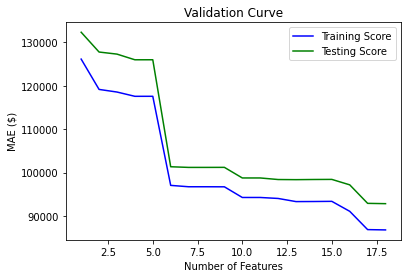

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

training = []
testing = []
ks = range(1, len(X_train.columns)+1)

for k in range(1, len(X_train.columns)+ 1):
    print(f'{k} features')
    
    selector = SelectKBest(score_func=f_regression, k=k)
    
    X_train_selected = selector.fit_transform(X_train, y_train)
    X_test_selected = selector.transform(X_test)
    
    all_names = X_train.columns
    selected_mask = selector.get_support()
    selected_names = all_names[selected_mask]
    print('Selected names: ', selected_names)

    
    model = LinearRegression()
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_train_selected)
    mae = mean_absolute_error(y_train, y_pred)
    training.append(mae)
    
    y_pred = model.predict(X_test_selected)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    testing.append(mae)
    print(f'Test MAE: ${mae:,.0f}')
    print(f'Test R2: {r2} \n')

plt.plot(ks, training, label='Training Score', color='b')
plt.plot(ks, testing, label='Testing Score', color='g')
plt.ylabel("MAE ($)")
plt.xlabel("Number of Features")
plt.title('Validation Curve')
plt.legend()
plt.show()

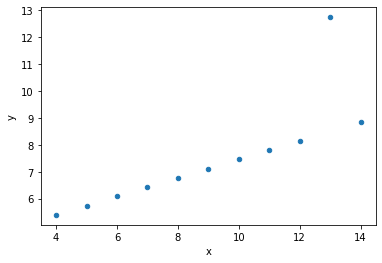

In [65]:
import seaborn as sns
ans = sns.load_dataset('anscombe').query('dataset=="III"')
ans.plot.scatter('x', 'y');

[0.49972727] 3.002454545454545


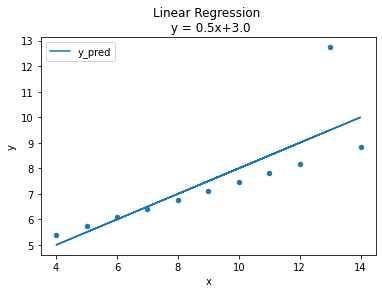

In [67]:
%matplotlib inline

ax = ans.plot.scatter('x', 'y')

ols = LinearRegression()
ols.fit(ans[['x']], ans['y'])

m = ols.coef_[0].round(2)
b = ols.intercept_.round(2)
title = f'Linear Regression \n y = {m}x+{b}'

ans['y_pred'] = ols.predict(ans[['x']])
ans.plot('x', 'y_pred', ax=ax, title=title);
print(ols.coef_, ols.intercept_)

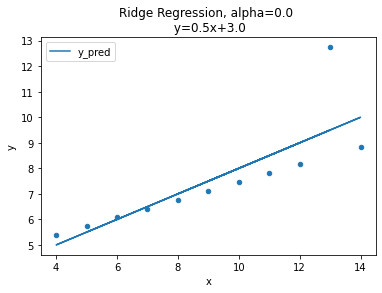

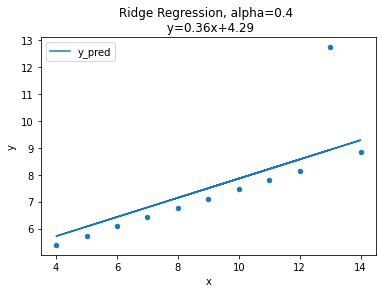

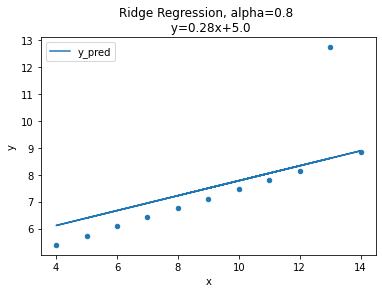

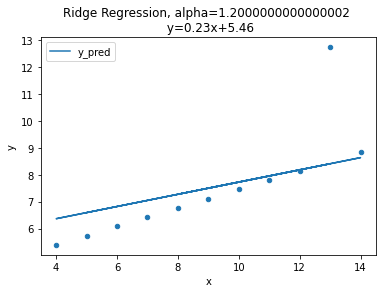

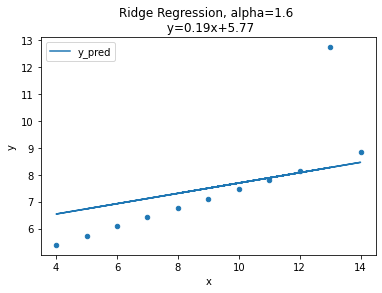

In [73]:
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge

def ridge_anscombe(alpha):
    ans = sns.load_dataset('anscombe').query('dataset=="III"')

    ax = ans.plot.scatter('x', 'y')

    ridge = Ridge(alpha=alpha, normalize=True)
    ridge.fit(ans[['x']], ans['y'])
    
    m = ridge.coef_[0].round(2)
    b = ridge.intercept_.round(2)
    title = f'Ridge Regression, alpha={alpha} \n y={m}x+{b}'
    
    ans['y_pred'] = ridge.predict(ans[['x']])
    
    ans.plot('x','y_pred', ax=ax, title=title)
    plt.show()

    

alphas = np.arange(0,2,0.4)
for alpha in alphas:
    ridge_anscombe(alpha = alpha)

In [74]:
from sklearn.linear_model import RidgeCV

alphas = [0.01, 0.05, 0.1, 0.2, 1.0, 10.0, 100.0]

ridge = RidgeCV(alphas=alphas, normalize=True, cv=3)
ridge.fit(ans[['x']],ans['y'])
print('alpha: ', ridge.alpha_)
print('best score: ',ridge.best_score_)

alpha:  0.2
best score:  0.4389766255562206


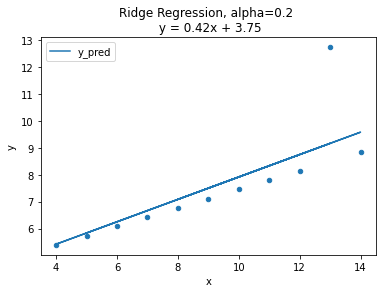

In [77]:
ax = ans.plot.scatter('x','y')

m = ridge.coef_[0].round(2)
b = ridge.intercept_.round(2)
title = f'Ridge Regression, alpha={ridge.alpha_} \n y = {m}x + {b}'

ans['y_pred'] = ridge.predict(ans[['x']])
ans.plot('x','y_pred',ax=ax, title=title)
plt.show()

Ridge Regression, with alpha=0.001
Test MAE : $136,544


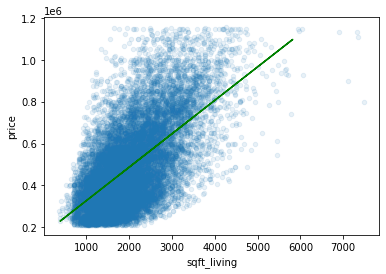

Ridge Regression, with alpha=0.01
Test MAE : $136,539


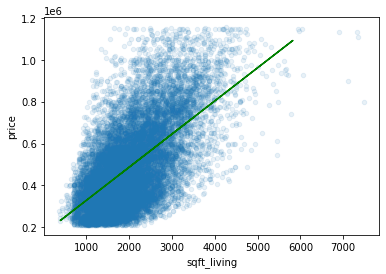

Ridge Regression, with alpha=0.1
Test MAE : $136,740


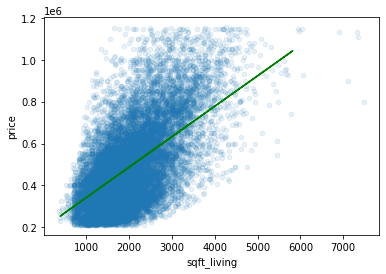

Ridge Regression, with alpha=1.0
Test MAE : $143,916


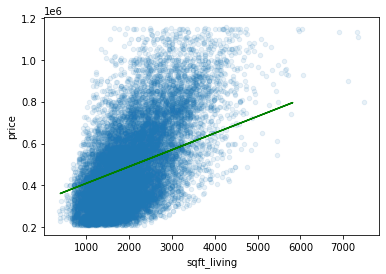

Ridge Regression, with alpha=10.0
Test MAE : $160,541


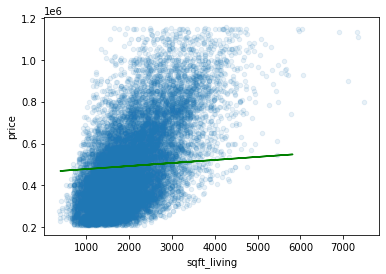

Ridge Regression, with alpha=100.0
Test MAE : $164,673


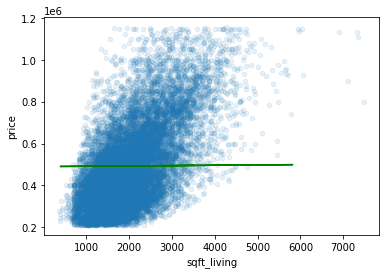

In [79]:
for alpha in [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]:
    feature = 'sqft_living'
    print(f'Ridge Regression, with alpha={alpha}')
    model = Ridge(alpha=alpha, normalize=True)
    model.fit(X_train[[feature]], y_train)
    
    y_pred = model.predict(X_test[[feature]])
    mae = mean_absolute_error(y_test, y_pred)
    print(f'Test MAE : ${mae:,.0f}')
    
    train.plot.scatter(feature, target, alpha=0.1)
    plt.plot(X_test[feature], y_pred, color='green')
    plt.show()

Ridge Regression, alpha
Test MAE: $92,824
Test R2: 0.633


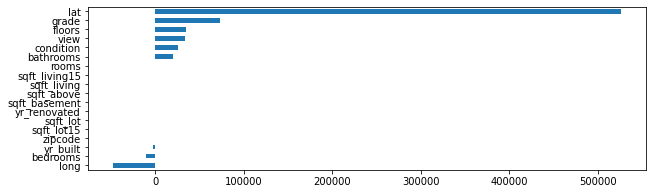

Ridge Regression, alpha
Test MAE: $92,812
Test R2: 0.633


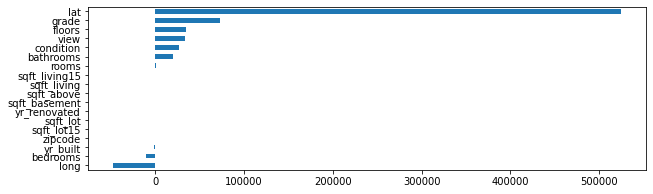

Ridge Regression, alpha
Test MAE: $92,801
Test R2: 0.633


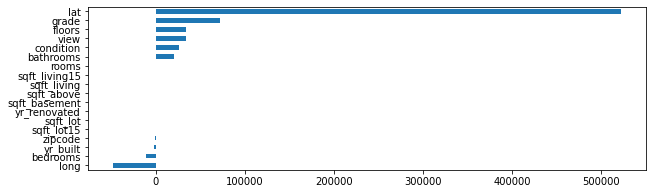

Ridge Regression, alpha
Test MAE: $92,794
Test R2: 0.632


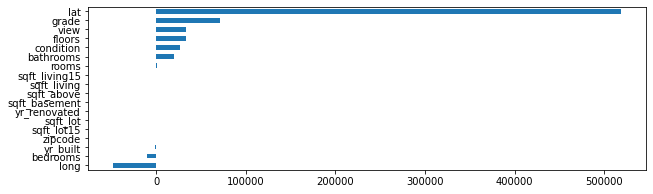

Ridge Regression, alpha
Test MAE: $92,800
Test R2: 0.632


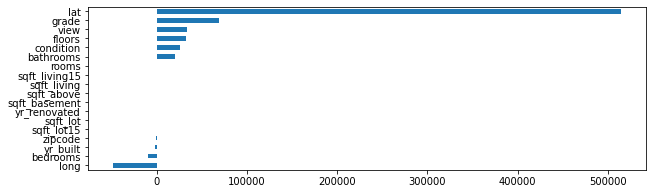

Ridge Regression, alpha
Test MAE: $93,186
Test R2: 0.627


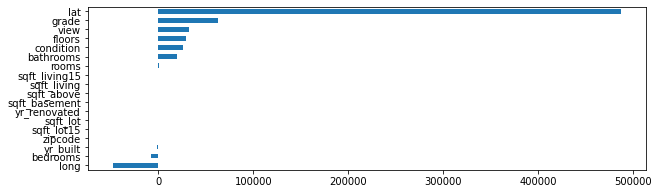

Ridge Regression, alpha
Test MAE: $107,595
Test R2: 0.536


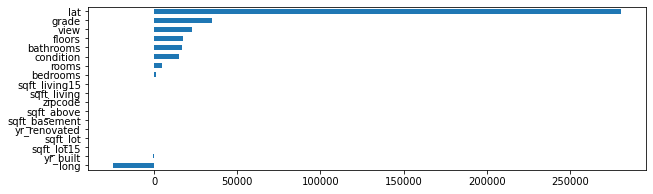

Ridge Regression, alpha
Test MAE: $107,595
Test R2: 0.536


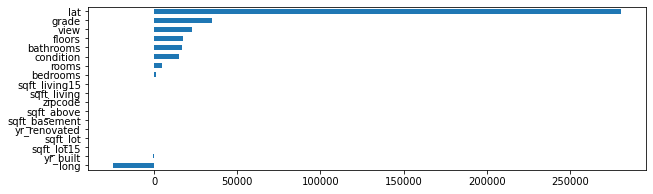

Ridge Regression, alpha
Test MAE: $162,268
Test R2: 0.033


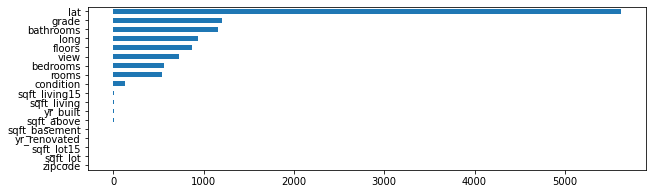

Ridge Regression, alpha
Test MAE: $164,890
Test R2: 0.001


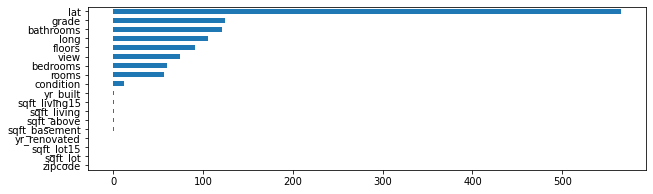

Ridge Regression, alpha
Test MAE: $92,827
Test R2: 0.633


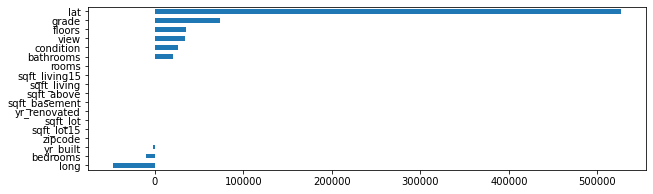

In [80]:
from sklearn.metrics import r2_score
for alpha in [0.001, 0.005, 0.01, 0.02, 0.03, 0.1, 1.0, 1, 100.0, 1000,0]:
    print(f'Ridge Regression, alpha')
    
    model = Ridge(alpha=alpha, normalize=True)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f'Test MAE: ${mae:,.0f}')
    print(f'Test R2: {r2:,.3f}')
    
    coefficients = pd.Series(model.coef_, X_train.columns)
    plt.figure(figsize=(10,3))
    coefficients.sort_values().plot.barh()
    plt.show()

In [96]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

def RidgeRegression(degree=3, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         Ridge(**kwargs))
    
for alpha in [0.001, 0.01, 0.0025, 0.05, 0.09, 0.12, 0.4, 1.0, 1, 5, 10, 100]:
    print(f'Ridge Regression, alpha={alpha}')
    
    model = RidgeRegression(alpha=alpha, normalize=True)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'Test MAE: ${mae:,.0f}')
    print(f'R2 Score: {r2:,.4f}\n')
    
coefs = model.named_steps['ridge'].coef_
print(f'Number of Features: {len(coefs)}')

Ridge Regression, alpha=0.001
Test MAE: $91,018
R2 Score: 0.0060

Ridge Regression, alpha=0.01
Test MAE: $91,045
R2 Score: 0.5376

Ridge Regression, alpha=0.0025
Test MAE: $91,320
R2 Score: 0.2307

Ridge Regression, alpha=0.05
Test MAE: $90,651
R2 Score: 0.6430

Ridge Regression, alpha=0.09
Test MAE: $90,676
R2 Score: 0.6467

Ridge Regression, alpha=0.12
Test MAE: $90,724
R2 Score: 0.6466

Ridge Regression, alpha=0.4
Test MAE: $91,147
R2 Score: 0.6421

Ridge Regression, alpha=1.0
Test MAE: $91,804
R2 Score: 0.6355

Ridge Regression, alpha=1
Test MAE: $91,804
R2 Score: 0.6355

Ridge Regression, alpha=5
Test MAE: $96,994
R2 Score: 0.5987

Ridge Regression, alpha=10
Test MAE: $102,946
R2 Score: 0.5626

Ridge Regression, alpha=100
Test MAE: $128,158
R2 Score: 0.3874

Number of Features: 1330


In [84]:
def RidgeCVRegression(degree = 3, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         RidgeCV(**kwargs))
    
alphas = np.arange(0.01, 0.2, 0.01)

model = RidgeCVRegression(alphas=alphas, normalize=True, cv=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Test MAE: ${mae:,.0f}')
print(f'R2 Score: {r2:,.4f}\n')

coefs = model.named_steps['ridgecv'].coef_
print(f'Number of Features: {len(coefs)}')

print(f'alpha: {model.named_steps["ridgecv"].alpha_}')
print(f'cv best score: {model.named_steps["ridgecv"].best_score_}') # best score: R2

Test MAE: $90,647
R2 Score: 0.6460

Number of Features: 1330
alpha: 0.06999999999999999
cv best score: 0.6908247029544299


In [86]:
X_total = pd.concat([X_train, X_test])
y_total = pd.concat([y_train, y_test])

In [87]:
model = RidgeCVRegression(alphas=alphas, normalize=True, cv=5)
model.fit(X_total, y_total)

coefs = model.named_steps['ridgecv'].coef_
print(f'Number of Features: {len(coefs)}')

print(f'alpha: {model.named_steps["ridgecv"].alpha_}')
print(f'cv best score: {model.named_steps["ridgecv"].best_score_}')

Number of Features: 1330
alpha: 0.060000000000000005
cv best score: 0.6801974133016893


In [88]:
coefs.max(), coefs.mean()

(69149.10323361281, 55.70723728988102)

In [89]:
coefs.sort()

In [90]:
coefs

array([-1340.15173205, -1124.35937699,  -825.00983458, ...,
        1715.03276599,  3948.74512788, 69149.10323361])

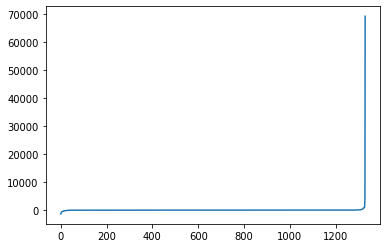

In [91]:
plt.plot(coefs)